In [3]:
#create folder in batchs
import os, sys
path1 = 'D:\VGGface2\overlap_vggface1_2/'  #指定名称文件夹所在路径
path2 = 'D:/cnnface/female_male_test_51_addnoise/noise_0.05/'    #新建文件夹所在路径
 
def MkDir():
    dirs = os.listdir(path1)
    for dir in dirs:
        file_name = path2 + str(dir)
        os.mkdir(file_name)
        
MkDir()

In [ ]:
#extract dnn_activation
import argparse
from torchvision import transforms
from torch.utils.data import DataLoader
from dnnbrain.dnn import analyzer
from dnnbrain.dnn import io as dnn_io

stim = 'D:/cnnface/female_male_test_51_addnoise/Face_template.csv'
netloader = dnn_io.NetLoader('vggface')
imgcropsize = netloader.img_size
transform = transforms.Compose([transforms.Resize(imgcropsize),
                                    transforms.ToTensor()])  
picdataset = dnn_io.PicDataset(stim, transform=transform)
picdataloader = DataLoader(picdataset, batch_size=8, shuffle=False)
dnn_act = analyzer.dnn_activation(picdataloader, 'vggface', 'fc3')


In [1]:
#Get classification result of network.
import numpy as np
import torch
from torchvision import transforms

from dnnbrain.dnn.models import dnn_test_model
from dnnbrain.dnn.io import PicDataset,NetLoader,DataLoader
from cnnface.core.vgg_identity_recons import Vgg_identity

vggid = Vgg_identity()
vggid.load_state_dict(torch.load('F:/Code/pretrained_model/vgg_male_female_CrossEntro.pth'))

imgcsv_path = 'D:\cnnface/female_male_test_51_addnoise/sinusoid_frame40_1000.csv'
transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor()])
PicSet = PicDataset(imgcsv_path,transform)
Picloader = DataLoader(PicSet,batch_size=32)

output = dnn_test_model(Picloader,vggid)

#save label to txt file
label = output[0]
label_f = np.argwhere(label==0)
label_m = np.argwhere(label==1)

np.savetxt('D:/cnnface/female_male_test_51_addnoise/label_sinusoid_frame40_f.txt',label_f)
np.savetxt('D:/cnnface/female_male_test_51_addnoise/label_frame40_m.txt',label_m)

ModuleNotFoundError: No module named 'cnnface'

一种就是很害怕的感觉，害怕出来结果意料之外。
一个科研人不应该害怕未知，不应该自己的结果。因为实验中与理论不符，意料之外的结果才有可能掀开了真理的帘子。
开拓未知的领域，验证未知，解释未知，变成人类所掌握的技术和理论，让冰冷地客观世界变得亲切和善。
与人相伴

In [42]:
# 
import numpy as np
from dnnbrain.dnn import io
import os
from PIL import Image 
import sys
sys.path.append("..")
from core.Image_processing import average_img

csv_file = 'D:/cnnface/female_male_test_51_addnoise/rcicr_gabor_noise.csv'
index_f = np.loadtxt('D:/cnnface/female_male_test_51_addnoise/label_garbo_f.txt').astype('int64')
index_m = np.loadtxt('D:/cnnface/female_male_test_51_addnoise/label_garbo_m.txt').astype('int64')

savepath_aver_f = 'D:/cnnface/female_male_test_51_addnoise/Face_template/classification_noise/female_aver_garbo.jpg'
savepath_aver_m = 'D:/cnnface/female_male_test_51_addnoise/Face_template/classification_noise/male_aver_garbo.jpg'
savepath_CI = 'D:/cnnface/female_male_test_51_addnoise/Face_template/classification_noise/CI_garbo_5.jpg'

#Get pictures path from stim_csv and label txt.
picset= io.PicDataset(csv_file)
pre_picpath = picset.picpath
sub_picpath = picset.picname

f_picpath = [os.path.join(pre_picpath,sub_picpath[i]) for i in index_f]
m_picpath = [os.path.join(pre_picpath,sub_picpath[i]) for i in index_m]

#average all of the pictures as their label.
aver_img_f = average_img(f_picpath)
aver_img_m = average_img(m_picpath)

#calculate the CI and superimpose image and subtract image.
ci = aver_img_f.astype('int64') - aver_img_m.astype('int64')
ci = ci -ci.min()
ci = ci *5 

In [44]:


(Image.fromarray(aver_img_f.astype('uint8'))).save(savepath_aver_f,quality=95)
(Image.fromarray(aver_img_m.astype('uint8'))).save(savepath_aver_m,quality=95)
(Image.fromarray(ci.astype('uint8'))).save(savepath_CI,quality=95)

1.0

In [33]:
#calculate the CI and superimpose image and subtract image.
ci = aver_img_f.astype('int64') - aver_img_m.astype('int64')


float64


In [15]:
import numpy as np
from PIL import Image

usecols = list(range(513))
usecols.remove(0)
sinusoid = np.loadtxt('D:/cnnface/rcrci/sinusoid/cycle/sinuoid_4.csv',delimiter=',',skiprows=1,usecols=usecols)
sinusoid = ((sinusoid - sinusoid.min())/(sinusoid.max() - sinusoid.min()))*255
img_sinu = Image.fromarray(sinusoid)
img_sinu.show()

In [21]:
#generateSinusoid
from PIL import Image
import numpy as np

img_size = 512/2
cycles = 2
angle = [0,30,60,90,120,150]
phase = [0,np.pi/2]

def generateSingleSinusoid(img_size, cycles, angle, phase):
    angle = np.radians(angle)
    sinepath = (np.linspace(0,cycles,img_size))[:,np.newaxis].repeat(img_size,axis=1)
    sinusoid = (sinepath*np.sin(angle) + sinepath.T*np.cos(angle)) * 2 *np.pi
    sinusoid = np.sin(sinusoid + phase)
    return sinusoid


def generateCombinSinusoid(img_size,cycles,angle,phase):
    sinusoid_combined = []
    for p in phase:
        for a in angle:
            sinusoid = generateSingleSinusoid(img_size,cycles,a,p)
            sinusoid = np.random.randn() * sinusoid
            sinusoid_combined.append(sinusoid)
    sinusoid_combined = np.array(sinusoid_combined)
    sinusoid_combined = np.sum(sinusoid_combined,axis=0)
    sinusoid_combined = (sinusoid_combined - sinusoid_combined.min()) / (sinusoid_combined.max() - sinusoid_combined.min())
    sinusoid_combined = sinusoid_combined *255
    return sinusoid_combined


scales = [(2**i)**2 for i in range(5)]
img_size = [512,256,128,64,32]
sinusoid_1 = generateCombinSinusoid(img_size[0],cycles,angle,phase)
sinusoid_2 = [generateCombinSinusoid(img_size[1],cycles,angle,phase) for i in range(4)]
sinusoid_3 = [generateCombinSinusoid(img_size[1],cycles,angle,phase) for i in 16]
sinusoid_4 = [generateCombinSinusoid(img_size[1],cycles,angle,phase) for i in 64]
sinusoid_5 = [generateCombinSinusoid(img_size[1],cycles,angle,phase) for i in 256]

for col in range(8):
    for row in range(8):
        sinusoid_com = sinusoid_3[col] + sinusoid_3[col+1]
sinusoid_com1 = np.vstack((sinusoid_2[0],sinusoid_2[1]))
sinusoid_com2 = np.vstack((sinusoid_2[2],sinusoid_2[3]))
print(sinusoid_com1.shape)
print(sinusoid_com2.shape)
sinusoid_com = np.hstack((sinusoid_com1,sinusoid_com2))

img_sinu = Image.fromarray(sinusoid_com)
img_sinu.show()

(512, 256)
(512, 256)


In [ ]:
# convert picture to L

In [1]:
import sys
sys.path.append("..")
from core import Image_processing

CI_ori_p = 'D:/cnnface/female_male_test_51_addnoise\Face_template/classification_noise/CI_ori.jpg'
CI_ori_5 = 'D:/cnnface/female_male_test_51_addnoise\Face_template/classification_noise/CI_ori_5.jpg'
CI_ori_20 = 'D:/cnnface/female_male_test_51_addnoise\Face_template/classification_noise/CI_ori_20.jpg'
CI_sinusoid_nor = 'D:/cnnface/female_male_test_51_addnoise\Face_template/classification_noise/CI_sinusoid_nor.jpg'
CI_sinusoid5_nor = 'D:/cnnface/female_male_test_51_addnoise\Face_template/classification_noise/CI_sinusoid5_nor.jpg'

# Image_processing.image_freq_hist_plot(CI_ori_p)
# Image_processing.image_freq_hist_plot(CI_ori_5)
# Image_processing.image_freq_hist_plot(CI_ori_20)
# Image_processing.image_freq_hist_plot(CI_sinusoid_nor)
# Image_processing.image_freq_hist_plot(CI_sinusoid5_nor)


Image_processing.img_zmap(CI_ori_p)
Image_processing.img_zmap(CI_ori_5)
Image_processing.img_zmap(CI_ori_20)
Image_processing.img_zmap(CI_sinusoid_nor)

-4.390167387977976
-4.808197314521075
-4.872946396132147
-4.875932880812649


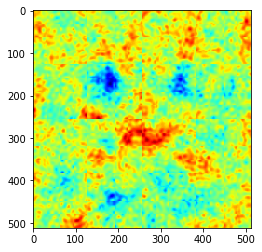

In [28]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as pg

CI_sinusoid_nor = 'D:/cnnface/female_male_test_51_addnoise\Face_template/classification_noise/CI_sinusoid_nor.jpg'
CI = Image.open(CI_sinusoid_nor)
CI_arr = np.array(CI)

ci_map = plt.imshow(CI_arr,cmap = 'jet',interpolation='nearest')
save_path  ='D:/cnnface/female_male_test_51_addnoise/Face_template/classification_noise/CI_jet.jpg'
pg.imsave(save_path,CI_arr,cmap = 'jet',format='jpg',dpi=1000)


In [ ]:
#' Generates 2IFC stimuli
#'
#' Generate stimuli for 2 images forced choice reverse correlation task.
#'
#' Will save the stimuli as #' PNGs to a folder, including .Rdata file needed for analysis of data
#' after data collection. This .Rdata file contains the parameters that were used to generate each stimulus.
#'
#' @export
#' @import matlab
#' @import dplyr
#' @import jpeg
#' @import png
#' @import foreach
#' @import doParallel
#' @importFrom stats setNames runif
#' @importFrom utils txtProgressBar setTxtProgressBar
#' @param base_face_files List containing base face file names used as base images for stimuli. Accepts JPEG and PNG images.
#' @param n_trials Number specifying how many trials the task will have (function will generate two images for each trial per base image: original and inverted/negative noise).
#' @param img_size Number specifying the number of pixels that the stimulus image will span horizontally and vertically (will be square, so only one integer needed).
#' @param stimulus_path Path to save stimuli and .Rdata file to.
#' @param label Label to prepend to each file for your convenience.
#' @param use_same_parameters Boolean specifying whether for each base image the same set of parameters is used (TRUE) or a unique set is created for each base image (FALSE).
#' @param seed Integer seeding the random number generator (for reproducibility).
#' @param maximize_baseimage_contrast Boolean specifying wheter the pixel values of the base image should be rescaled to maximize its contrast.
#' @param noise_type String specifying noise pattern type (defaults to \code{sinusoid}; other options: \code{gabor}).
#' @param nscales Integer specifying the number of incremental spatial scales. Defaults to 5. Higher numbers will add higher spatial frequency scales.
#' @param sigma Number specifying the sigma of the Gabor patch if noise_type is set to \code{gabor} (defaults to 25).
#' @param ncores Number of CPU cores to use (default: detectCores()-1).
#' @param return_as_dataframe Boolean specifying whether to return a data frame with the raw noise of the stimuli that were generated (default: FALSE). Data frame columns represent pixel values, data frame rows represent stimuli.
#' @param save_as_png Boolean specifying whether to write the stimuli as images to disk (default: TRUE).
#' @param save_rdata Boolean specifying whether .RData file with stimulus parameters will be saved (default: TRUE). Note: you always need to save the .RData file so that you can retrieve the stimulus parameters to compute classifciation images. This function argument exists primarily for internal rcicr use.
#' @return Nothing, everything is saved to files, unless return_as_dataframe is set to TRUE.
generateStimuli2IFC <- function(base_face_files, n_trials=770, img_size=512, stimulus_path='./stimuli', label='rcic', use_same_parameters=TRUE, seed=1, maximize_baseimage_contrast=TRUE, noise_type='sinusoid', nscales=5, sigma=25, ncores=parallel::detectCores()-1, return_as_dataframe=FALSE, save_as_png=TRUE, save_rdata=TRUE) {

  # Initialize #
  p <- generateNoisePattern(img_size, noise_type=noise_type, nscales=nscales, sigma=sigma)
  dir.create(stimulus_path, recursive=T, showWarnings = F)
  set.seed(seed)

  stimuli_params <- list()
  base_faces <- list()

  if (!is.list(base_face_files)) {
    write("Please provide base face file name as named list, e.g. base_face_files=list(aName='baseface.jpg')", stderr())
    stop()
  }

  for (base_face in names(base_face_files)) {
    # Read base face
    filename <- base_face_files[[base_face]]
    if (grepl('png|PNG', filename)) {
      img <- png::readPNG(filename)
    } else if (grepl('jpeg|JPEG|jpg|JPG', filename)) {
      img <- jpeg::readJPEG(filename)
    } else {
      stop(paste0('Error in reading base image file ',
                  filename, ': must be a PNG or JPEG file.'))
    }

    # Check if base face is square. If not, throw an error
    if (dim(img)[1] != dim(img)[2]) {
      stop(paste0('Base face is not square! It\'s ', dim(img)[1], ' by ',
                  dim(img)[2], ' pixels. Please use a square base face.'))
    }

    # Change base face to greyscale if necessary
    if (length(dim(img)) == 3) {
      img <- apply(img, c(1, 2), mean)
    }

    # Adjust size of base face
    #base_faces[[base_face]] <- biOps::imgMedianShrink(img, x_scale=img_size/ncol(img), y_scale=img_size/nrow(img))

    # If necessary, rescale to maximize contrast
    if (maximize_baseimage_contrast) {
      img <- (img - min(img)) / (max(img) - min(img))
    }

    # Save base image to list
    base_faces[[base_face]] <- img
  }

  # Compute number of parameters needed  #
  nparams <- sum(6*2*(2^(0:(nscales-1)))^2)

  # Generate parameters #
  if (use_same_parameters) {

    # Generate stimuli parameters, one set for all base faces
    params <- matlab::zeros(n_trials, nparams)
    for (trial in 1:n_trials) {
      params[trial,] <- (runif(nparams) * 2) - 1
    }

    # Assign to each base face the same set
    for (base_face in names(base_faces)) {
      stimuli_params[[base_face]] <- params
    }

    rm(params)
  } else {
    for (base_face in names(base_faces)) {
      # Generate stimuli parameters, unique to each base face
      stimuli_params[[base_face]] <- matlab::zeros(n_trials, nparams)
      for (trial in 1:n_trials) {
        stimuli_params[[base_face]][trial,] <- (runif(nparams) * 2) - 1
      }
    }

  }

  # Generate stimuli
  pb <- txtProgressBar(min = 1, max = n_trials, style = 3)

  stimuli <- matlab::zeros(img_size, img_size, n_trials)

  cl <- parallel::makeCluster(ncores, outfile = "")
  doParallel::registerDoParallel(cl)

  stims <- foreach::foreach(
    trial = 1:n_trials, .packages = 'rcicr', .final = function(x) setNames(as.data.frame(x), as.character(1:n_trials)), .combine = 'cbind', .multicombine = TRUE) %dopar% {
    if (use_same_parameters) {
      # compute noise pattern, can be used for all base faces
      stimuli[,,trial] <- generateNoiseImage(stimuli_params[[base_face]][trial,], p)
    }

    for (base_face in names(base_faces)) {
      if (!use_same_parameters) {
        # compute noise pattern unique to this base face
        stimuli[,,trial] <- generateNoiseImage(stimuli_params[[base_face]][trial,], p)
      }

      # Scale noise (based on simulations, most values fall within this range [-0.3, 0.3], test
      # for yourself with simulateNoiseIntensities())
      stimulus <- ((stimuli[,,trial] + 0.3) / 0.6)

      # add base face
      combined <- (stimulus + base_faces[[base_face]]) / 2

      # write to file
      if (save_as_png) {
        png::writePNG(combined, paste(stimulus_path, paste(label, base_face, seed, sprintf("%05d_ori.png", trial), sep="_"), sep='/'))
      }

      # compute inverted stimulus
      stimulus <- ((-stimuli[,,trial] + 0.3) / 0.6)

      # add base face
      combined <- (stimulus + base_faces[[base_face]]) / 2

      # write to file
      if (save_as_png) {
        png::writePNG(combined, paste(stimulus_path, paste(label, base_face, seed, sprintf("%05d_inv.png", trial), sep="_"), sep='/'))
      }

      # Return CI
      if (return_as_dataframe) {
        return(as.vector(stimuli[,,trial]))
      }
    }

    # Update progress bar
    setTxtProgressBar(pb, trial)
  }
  parallel::stopCluster(cl)

  # Save all to image file (IMPORTANT, this file is necessary to analyze your data later and create classification images)
  generator_version <- '0.4.0'

  if (save_rdata) {
    save(base_face_files, base_faces, img_size, label, n_trials, noise_type, p, seed, stimuli_params, stimulus_path, trial, use_same_parameters, generator_version, file=paste(stimulus_path, paste(label, "seed", seed, "time", format(Sys.time(), format="%b_%d_%Y_%H_%M.Rdata"), sep="_"), sep='/'), envir=environment())
  }

  # Return CIs
  if (return_as_dataframe) {
    return(stims)
  }
}

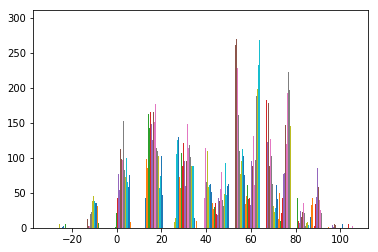

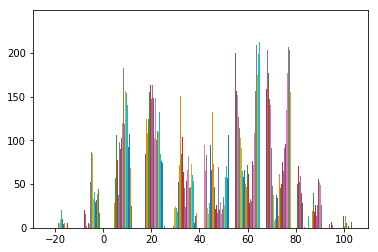

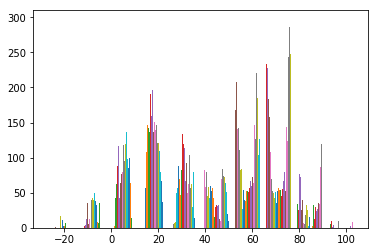

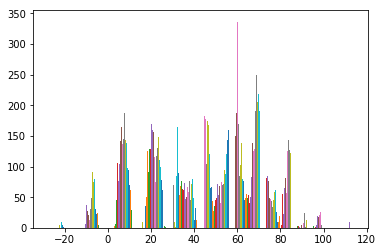

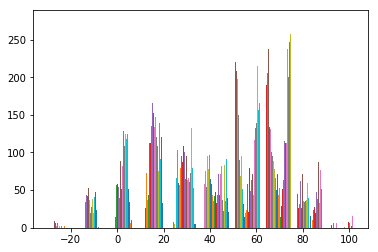

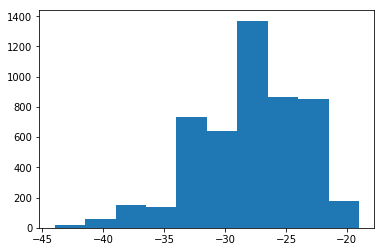

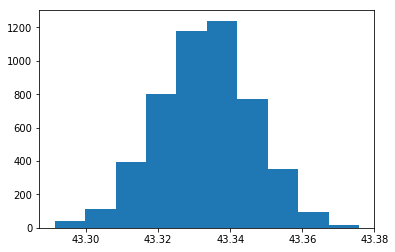

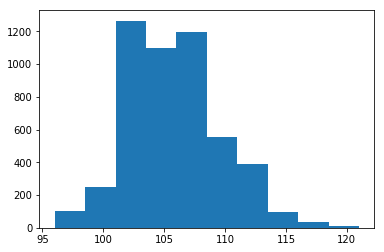

In [5]:
import os
import numpy as np
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt

#read image path from csv.file
csv_file = 'D:/cnnface/female_male_test_51_addnoise/rcicr_sinusoid_noise.csv'
pd = pd.read_csv(csv_file,skiprows=1)
stimID = np.array(pd['stimID'])
with open(csv_file,'r') as f:
    picpath = f.readline().rstrip()
    
#read base img 
base_img = Image.open('D:/cnnface/female_male_test_51_addnoise/Face_template/face_template/frame054_gray_512.jpg')
baseimg_arr = np.array(base_img).astype('int32')
img_min = []
img_mean = []
img_max = []

#read image from array
#calculate the min mean max of singal pictures
for x,i in enumerate(stimID):
    picimg = Image.open(os.path.join(picpath, i))
    picimg_arr = np.array(picimg).astype('int32')
    contrast = picimg_arr - baseimg_arr
    # - base image to get the pixel (positive and negative)
    con_min = contrast.min()
    con_mean = contrast.mean()
    con_max = contrast.max()
    
    if x <5:
        plt.hist(contrast)
        plt.show()
    img_min.append(con_min)
    img_mean.append(con_mean)
    img_max.append(con_max)
#sum and plot the hist of min ,mean,max of all pictures

plt.hist(img_min)
plt.show()
plt.hist(img_mean)
plt.show()
plt.hist(img_max)
plt.show()

In [16]:
#load RData file to python
import rpy2.robjects as robjects
import numpy as np
robjects.r['load']("D:/cnnface/female_male_test_51_addnoise/Face_template/meta_data/pythonRead/sinusoid1000_patches.RData")

x = robjects.r['patches']
print(np.array(x))

(512, 512, 60)


In [52]:
#convert .RData to npy file
import rpy2.robjects as robjects
import numpy as np

robjects.r['load']("D:/cnnface/female_male_test_51_addnoise/Face_template/meta_data/rcic_seed_1_time_9月_18_2019_10_07.Rdata")
params = robjects.r['stimuli_params'][0]

params_1000 = np.array(params)

robjects.r['load']("D:/cnnface/female_male_test_51_addnoise/Face_template/meta_data/rcic_seed_1_time_9月_18_2019_10_30.Rdata")
params = robjects.r['stimuli_params'][0]

params_2000 = np.array(params)

robjects.r['load']("D:/cnnface/female_male_test_51_addnoise/Face_template/meta_data/rcic_seed_1_time_9月_18_2019_10_45.Rdata")
params = robjects.r['stimuli_params'][0]

params_3000 = np.array(params)

robjects.r['load']("D:/cnnface/female_male_test_51_addnoise/Face_template/meta_data/rcic_seed_1_time_9月_18_2019_11_02.Rdata")
params = robjects.r['stimuli_params'][0]

params_4000 = np.array(params)

robjects.r['load']("D:/cnnface/female_male_test_51_addnoise/Face_template/meta_data/rcic_seed_1_time_9月_18_2019_11_22.Rdata")
params = robjects.r['stimuli_params'][0]

params_5000 = np.array(params)

p = np.concatenate((params_1000,params_2000),axis=0)
p = np.concatenate((p,params_3000),axis=0)
p = np.concatenate((p,params_4000),axis=0)
p = np.concatenate((p,params_5000),axis=0)

np.save('D:/cnnface/female_male_test_51_addnoise/Face_template/meta_data/params_5000',p)



In [58]:
#convert .RData to npy file
import rpy2.robjects as robjects
import numpy as np

robjects.r['load']("D:/cnnface/female_male_test_51_addnoise/Face_template/meta_data/rcic_seed_1_time_9月_18_2019_10_07.Rdata")
p = robjects.r['p']
print(p.names)
patches = p[0]
patchidx = p[1]

patches = np.array(patches)
patchidx = np.array(patchidx)

np.save('D:/cnnface/female_male_test_51_addnoise/Face_template/meta_data/patches.npy',patches)
np.save('D:/cnnface/female_male_test_51_addnoise/Face_template/meta_data/patchidx.npy',patchidx)


[1] "patches"           "patchIdx"          "noise_type"       

[4] "generator_version"



In [ ]:
#calculate the CIs of different level 
import numpy as np
params = np.load('D:/cnnface/female_male_test_51_addnoise/Face_template/meta_data/params_5000.npy')

patches = np.load('D:/cnnface/female_male_test_51_addnoise/Face_template/meta_data/patches.npy')
patchidx = np.load('D:/cnnface/female_male_test_51_addnoise/Face_template/meta_data/patchidx.npy')

#calcaute the CI of scale2
